In [12]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from tensorflow.keras import layers, losses
from tensorflow.keras.optimizers import Adam
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from enum import Enum
import PIL
import PIL.Image
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping 
from PIL import Image
import random

In [13]:
cnn = Sequential()
cnn.add(Conv2D(64, (3, 3), activation='relu', input_shape=(50, 100, 1)))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(128, (3, 3), activation='relu'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(256, (3, 3), activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dense(50 * 100, activation='sigmoid'))
cnn.add(Reshape((50, 100)))

In [14]:
class AutoencoderWithDense(Model):
    def __init__(self, latent_dim, dropout_rate=0.2):
        super(AutoencoderWithDense, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(1024, activation="relu"), # Added Dense
            layers.Dropout(dropout_rate), 
            layers.Dense(512, activation="relu"), # Added Dense
            layers.Dropout(dropout_rate), 
            layers.Dense(latent_dim, activation='relu'),
            ])
        self.decoder = tf.keras.Sequential([

            layers.Dense(512, activation="relu"), # Added Dense
            layers.Dropout(dropout_rate), 
            layers.Dense(1024, activation="relu"), # Added Dense
            layers.Dropout(dropout_rate), 
            layers.Dense(50 * 100, activation='sigmoid'),
            layers.Reshape((50, 100)) # is reversed from other functions
            # layers.Reshape((100, 200)) # is reversed from other functions
            ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [15]:
autoencoder_with_dense = AutoencoderWithDense(latent_dim = 250)
autoencoder_with_dense.build(input_shape=(None, 50, 100, 1))

In [16]:
cnn.load_weights('/Users/dominicmazza/Desktop/Neural Networks/final project/TomJerryDoodles-main/src/SavedModels/CNN.keras')
autoencoder_with_dense.load_weights('/Users/dominicmazza/Desktop/Neural Networks/final project/TomJerryDoodles-main/src/SavedModels/DenseModel.keras')

In [17]:
def loadImage(input_file_path, output_file_path, target_height=50, target_width=100, isRGB=False):
    input_image = Image.open(input_file_path)

    if not isRGB:
        input_image = input_image.convert("L")

    input_image = input_image.resize((target_width, target_height))
    input_array = np.array(input_image) / 118.0
    return input_array, output_file_path


In [18]:
personal_image_shape = (100, 50)

filenames_tom = ["tom1.jpg", "tom2.jpg", "tom3.jpg", "tom4.jpg"]
filenames_jerry = ["jerry1.jpg", "jerry2.jpg", "jerry3.jpg", "jerry4.jpg"]

inputImageBasepathTom = r'/Users/dominicmazza/Desktop/Neural Networks/final project/TomJerryDoodles-main/handdrawn/tom/' 

inputImageBasepathJerry = r'/Users/dominicmazza/Desktop/Neural Networks/final project/TomJerryDoodles-main/handdrawn/jerry/'

inputImages = []
outputImages = []

for filename in filenames_tom:
    inputImagePathTom = f"{inputImageBasepathTom}{filename}"
    loaded_values = loadImage(inputImagePathTom, personal_image_shape, isRGB=False)
    inputImageTom = loaded_values[0]
    imageLabelTom = loaded_values[1]
    inputImages.append(inputImageTom)
    outputImages.append(imageLabelTom)

for filename in filenames_jerry:
    inputImagePathJerry = f"{inputImageBasepathJerry}{filename}"
    loaded_values = loadImage(inputImagePathJerry, personal_image_shape, isRGB=False)
    inputImageJerry = loaded_values[0]
    imageLabelJerry = loaded_values[1]
    inputImages.append(inputImageJerry)
    outputImages.append(imageLabelJerry)

# Convert lists to numpy arrays
inputImagesArray = np.array(inputImages)
outputImagesArray = np.array(outputImages)



In [19]:
print("Input Images Shape:", inputImagesArray.shape)
print("Original Image Shape:", inputImageTom.shape)

Input Images Shape: (8, 50, 100)
Original Image Shape: (50, 100)


In [20]:
cnn_model_output = cnn.predict(np.array(inputImagesArray))
dense_model_output = autoencoder_with_dense.predict(np.array(inputImagesArray))

1/1 [==============================] - 0s 63ms/step


In [21]:
def display_images(edge_filtered, cnn_output, dense_output, ground_truth):
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(edge_filtered, cmap='gray') 
    plt.title('Edge Filtered')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(cnn_output, cmap='gray')  
    plt.title('CNN Output')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(dense_output, cmap='gray') 
    plt.title('Dense Model Output')
    plt.axis('off')

    plt.show()


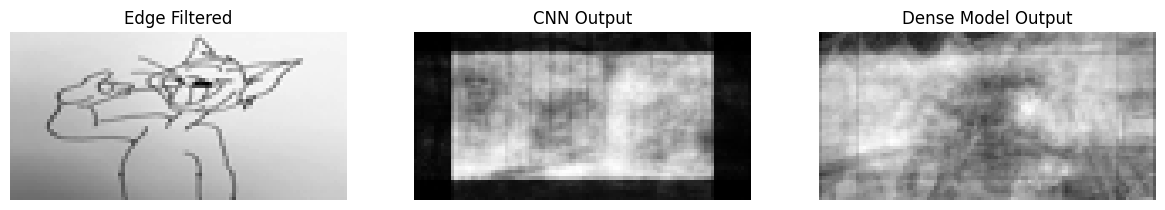

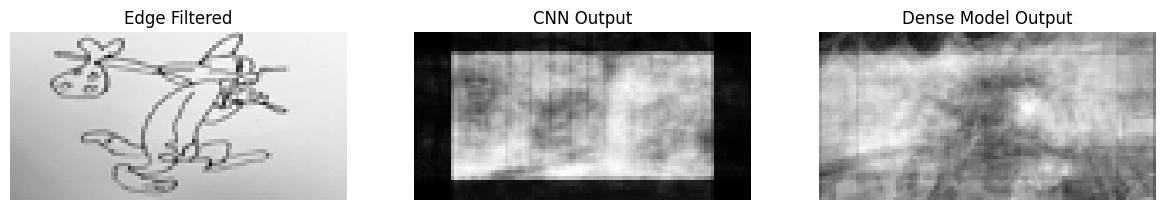

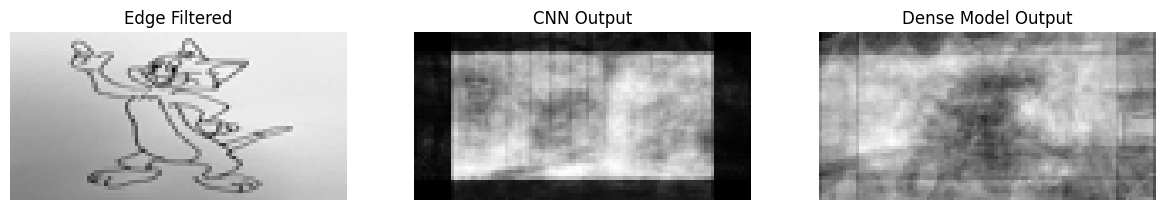

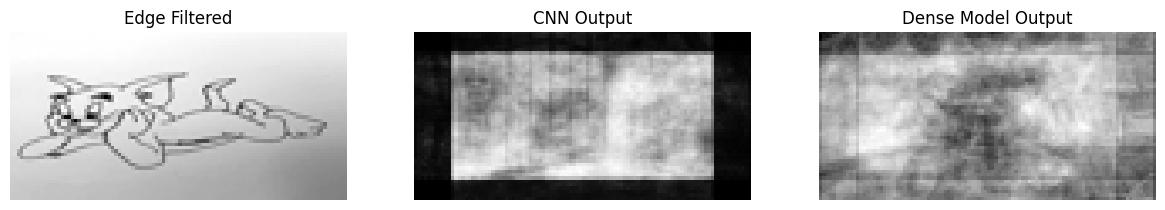

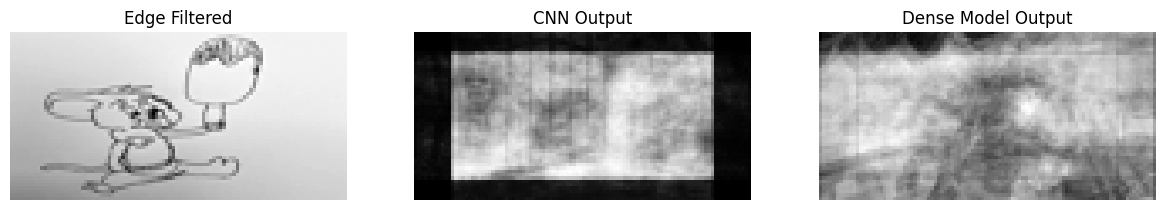

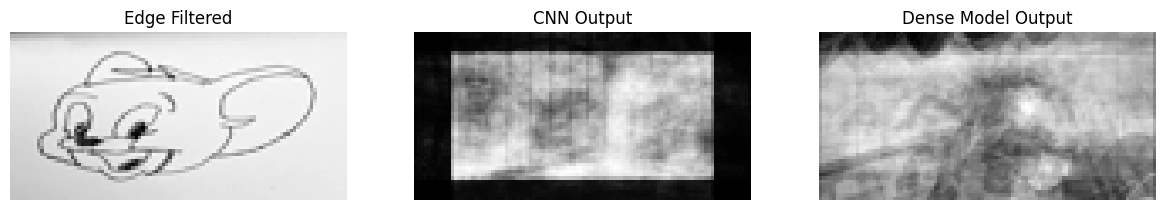

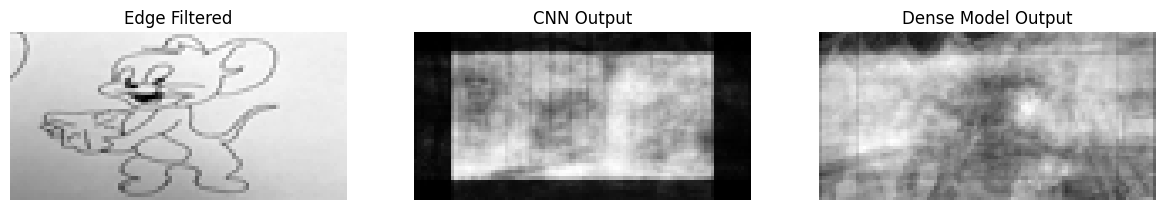

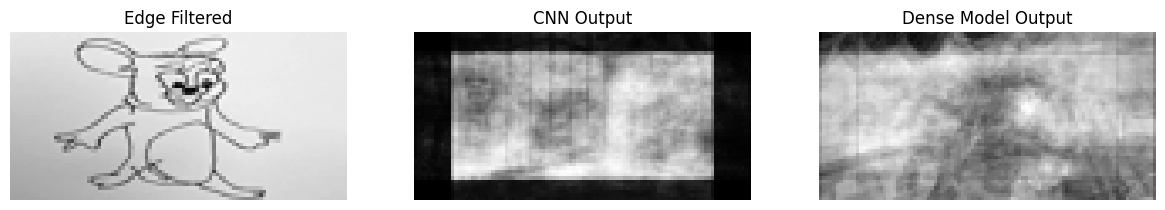

In [22]:
for i in range(len(inputImagesArray)):
    display_images(inputImagesArray[i], cnn_model_output[i], dense_model_output[i], outputImagesArray[i])